In [31]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
#nltk.download('wordnet')
import gensim
from gensim import corpora


# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

import  textblob
#import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

In [3]:
job_data = pd.read_csv("E:/Data Science Material/AssignmentToSubmit/Text Mining/6. Analyzing online Job Postings/data job posts.csv")

In [4]:
job_data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [5]:
job_data['date'].head()

0     Jan 5, 2004
1     Jan 7, 2004
2     Jan 7, 2004
3     Jan 7, 2004
4    Jan 10, 2004
Name: date, dtype: object

In [6]:
df_date = job_data.groupby(['date'])

In [7]:
df_date.count()

,jobpost,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
date,,,,,,,,,,,,,,,,,,,,,
Apr 1,11,11,11,0,2,1,0,5,9,11,...,5,11,11,11,0,9,4,11,11,11
"Apr 1, 2004",7,7,7,0,0,0,0,0,0,7,...,0,7,0,7,0,5,0,7,7,7
"Apr 1, 2008",7,7,7,0,2,5,0,5,7,7,...,6,7,7,7,0,6,0,7,7,7
"Apr 1, 2009",2,2,2,0,1,2,0,2,1,2,...,1,2,2,2,1,1,0,2,2,2
"Apr 1, 2010",6,6,6,0,5,4,0,2,4,6,...,4,6,6,6,0,6,0,6,6,6
"Apr 1, 2011",5,5,5,0,2,1,0,3,4,5,...,2,5,5,5,1,3,1,5,5,5
"Apr 1, 2012",4,4,4,0,0,0,0,1,1,4,...,1,4,4,4,1,0,0,4,4,4
"Apr 1, 2014",9,9,9,0,2,3,1,5,6,9,...,1,9,9,9,0,9,2,9,9,9
Apr 10,10,10,10,0,8,2,0,8,6,10,...,4,10,10,10,1,5,3,10,10,10


In [8]:
df_date.sum()

,Year,Month,IT
date,,,
Apr 1,22165,44,1.0
"Apr 1, 2004",14028,28,1.0
"Apr 1, 2008",14056,28,2.0
"Apr 1, 2009",4018,8,1.0
"Apr 1, 2010",12060,24,0.0
"Apr 1, 2011",10055,20,0.0
"Apr 1, 2012",8048,16,0.0
"Apr 1, 2014",18126,36,1.0
Apr 10,20150,40,3.0


In [5]:
job_data['date'] = pd.to_datetime(job_data['date'], errors = 'coerce')

In [6]:
# Extract date features
#job_data['Date_dayofweek'] =job_data['Date'].dt.dayofweek
job_data['Date_month'] =job_data['date'].dt.month 
job_data['Date_year'] =job_data['date'].dt.year
job_data['Date_day'] =job_data['date'].dt.day 

Date_month
1.0     0.207250
2.0     0.190127
3.0     0.181398
4.0     0.208899
5.0     0.198300
6.0     0.294444
7.0     0.201254
8.0     0.174830
9.0     0.214891
10.0    0.206475
11.0    0.199619
12.0    0.178073
Name: IT, dtype: float64


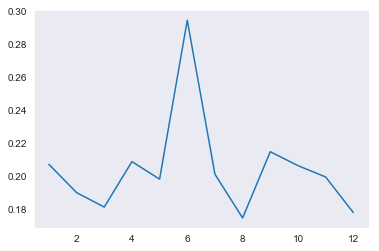

In [29]:
IT_per_month = job_data.groupby(['Date_month']).mean()['IT']
#plt.plot(IT_per_month)
print(IT_per_month)
plt.plot(IT_per_month)

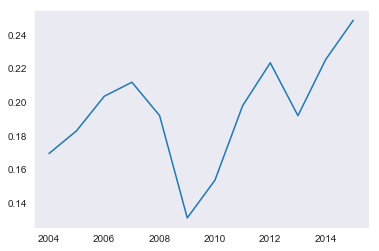

In [8]:
IT_per_year = job_data.groupby(['Date_year']).mean()['IT']
plt.plot(IT_per_year)

In [15]:
job_data['Company'].value_counts()

ArmenTel CJSC                                                                                                                 353
World Vision Armenia                                                                                                          239
Mentor Graphics Development Services CJSC                                                                                     236
Career Center NGO                                                                                                             229
Orange Armenia                                                                                                                203
Ameriabank CJSC                                                                                                               196
Converse Bank CJSC                                                                                                            161
SAS Group LLC                                                                             

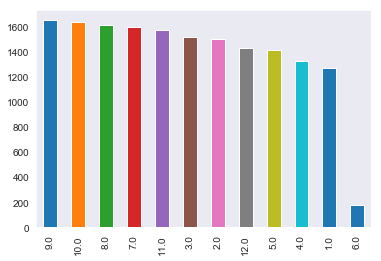

In [45]:
job_per_month = job_data['Date_month'].value_counts()
#pd.DataFrame(job_per_month,columns=["Date_month","no_of_jobs"])
job_per_month.plot(kind="bar")

## Data Cleaning

Removing duplicate job post and handling missing values

In [4]:
job_data_ToAnalyze = job_data.filter(['jobpost','Title','JobDescription','JobRequirment','RequiredQual','AboutC','Year','IT'])

In [5]:
print(job_data_ToAnalyze.shape)
job_data_clean = job_data_ToAnalyze.drop_duplicates(['jobpost','Title'])
job_data_clean = job_data_clean.dropna(subset=['RequiredQual'])
print(job_data_clean.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(job_data_ToAnalyze.shape[0]-job_data_clean.shape[0]))

(19001, 8)
(18458, 8)
Removed 543 duplicates (based on jobpost + Title)


In [8]:
job_data_clean.head()

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,Year,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,2004,False
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,2004,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,2004,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,2004,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,2004,True


In [7]:
def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)


def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en')


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    #wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    #tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    #tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_nostop

In [23]:
job_data_clean['jobpost'] = job_data_clean['jobpost'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
job_data_clean['jobpost'] = job_data_clean['jobpost'].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
job_data_clean['jobpost'] = job_data_clean['jobpost'].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
re1 = '(www)'  # Word 1
re2 = '(\\.)'  # Any Single Character 1
re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 1
re4 = '(\\.)'  # Any Single Character 2
re5 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 2
rg = re.compile(re1 + re2 + re3 + re4 + re5, re.IGNORECASE | re.DOTALL)
job_data_clean['jobpost'] = job_data_clean['jobpost'].apply(lambda x: re.sub(rg, "", x))
re1 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 1
re2 = '(\\.)'  # Any Single Character 1
re3 = '((?:[a-z][a-z0-9_]*))'  # Word 1
rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
job_data_clean['jobpost'] = job_data_clean['jobpost'].apply(lambda x: re.sub(rg, "", x))
job_data_clean.jobpost = job_data_clean.jobpost.apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

In [24]:
job_data_clean['jobpost_token'] = job_data_clean.jobpost.map(word_tokenize)

In [25]:
tokens_clean = preprocess((job_data_clean.iloc[4])['jobpost_token']) # we know this is a software job
print(tokens_clean)
#job_data_clean.iloc[4]['jobpost']

['yerevan', 'brandy', 'software', 'developer', 'yerevan', 'rendering', 'technical', 'assistance', 'database', 'management', 'systems', 'realization', 'sql', 'servers', 'maintenance', 'activities', 'back-up', 'replication', 'participation', 'designing', 'software', 'development', 'projects', 'university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'windows', 'server', 'networking', 'tcp/', 'ip', 'technologies', 'ms', 'sql', 'server', 'visual', 'basic', 'least', 'years', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norms', 'accepted', 'successful', 'candidates', 'submit', 'cv', 'relevant', 'recommendation', 'letters', 'previous', 'employers', 'copy', '-ies', 'diploma', '-s', 'relevant', 'certificates', 'available', 'color', 'photo', 'x', 'either', 'isakov', 'avenue', 'yerevan', 'send', 'following', 'fax', 'e-mail', 'human', 'resources', 'department', 'armine', 'bibilyan', 'please', 'clea

yerevan brandy software developer yerevan rendering technical assistance database management systems realization sql servers maintenance activities back-up replication participation designing software development projects university degree economical background plus excellent knowledge windows 2000 server networking tcp/ ip technologies ms sql 2000 server visual basic 6 least 2 years experience database software development good knowledge english remuneration commensurate norms accepted successful candidates submit cv 2 relevant recommendation letters previous employers copy -ies diploma -s relevant certificates available 1 color photo 3x4 either 2 isakov avenue 375082 yerevan send following fax 587 713 e-mail armine.bibilyan ... human resources department armine bibilyan please clearly mention letter learned opportunity career center mention url website www.careercenter.am thanks 20 january 2004 18:00 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- place free posting career related

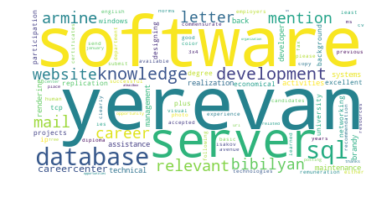

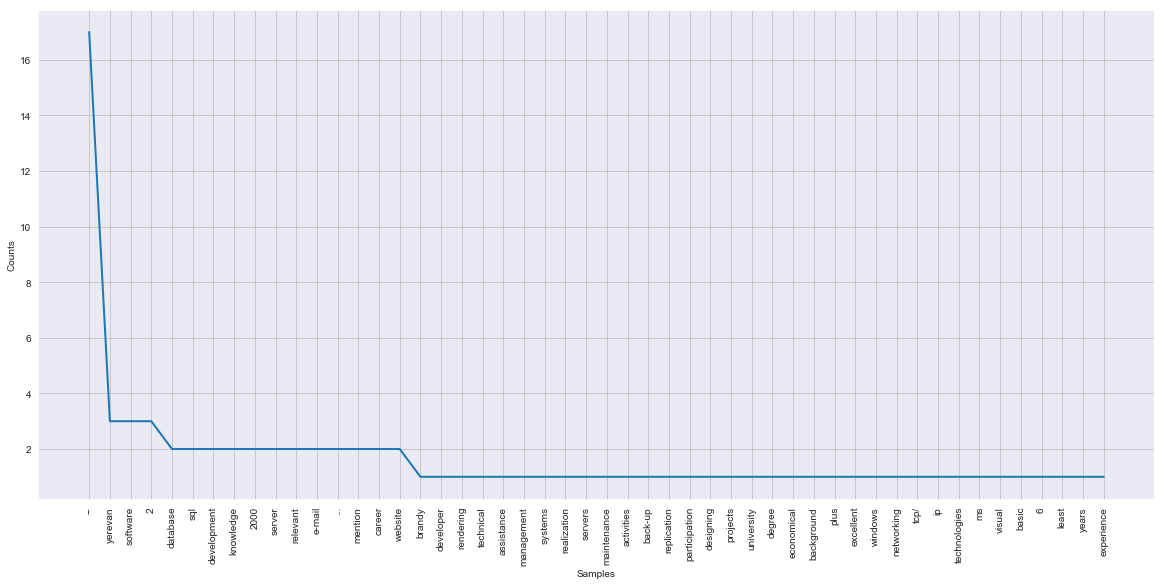

In [14]:
plotWC(tokens_clean)

In [26]:
job_data_clean['jobpost_processed'] = job_data_clean.jobpost_token.apply(preprocess)

In [27]:
bigram = gensim.models.Phrases(job_data_clean['jobpost_processed'], min_count=5, threshold=110)  # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[job_data_clean['jobpost_processed']], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)    

In [28]:
job_data_clean.jobpost_processed = make_bigrams(job_data_clean.jobpost_processed)

In [32]:
job_data_clean.jobpost_processed = lemmatization(job_data_clean.jobpost_processed, allowed_postags=['NOUN', 'VERB'])  # 'ADJ',, 'ADV'])

In [35]:
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
dictionary = corpora.Dictionary(job_data_clean['jobpost_processed'])
#print(dictionary)
dictionary.filter_extremes(no_below=3, no_above=0.7)
#print(dictionary)

## Get Feature Matrix

In [198]:
print(job_data_clean.jobpost_processed[8])

['yerevan', 'brandy', 'assistant', 'managing', 'director', 'yerevan', 'coordinating', 'work', 'subordinate', 'employees', 'maintaining', 'liaison', 'subdivisions', 'within', 'managing', 'correspondence', 'flow', 'realizing', 'written', 'verbal', 'translations', 'organizing', 'meetings', 'conferences', 'compiling', 'minutes', 'meetings', 'drawing', 'reports', 'operating', 'office', 'equipment', 'university', 'degree', 'least', 'years', 'experience', 'relevant', 'field', 'mastership', 'office', 'work', 'competency', 'business', 'ethics', 'excellent', 'working', 'knowledge', 'written', 'verbal', 'russian', 'english', 'knowledge', 'french', 'plus', 'knowledge', 'ms', 'office', 'strong', 'problemsolving', 'organizational', 'skills', 'outstanding', 'interpersonal', 'skills', 'remuneration', 'commensurate', 'norms', 'accepted', 'successful', 'candidates', 'submit', 'cv', 'relevant', 'recommendation_letters', 'previous', 'employers', 'copy_ies', 'diploma', 'color_photo', 'x', 'either_isakov', 

In [42]:
job_data_clean['jobpost_processedtext'] = job_data_clean.jobpost_processed.apply(lambda x: ' '.join(x))

In [201]:
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(job_data_clean['jobpost_processedtext'])
print(grain_tf.shape)

vec_tf = CountVectorizer(min_df=2)
grain_tf = vec_tf.fit_transform(job_data_clean['jobpost_processedtext'])
print(grain_tf.shape)

(18458, 40870)
(18458, 26407)


In [202]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
grain_tfidf = vec_tfidf.fit_transform(job_data_clean['jobpost_processedtext'])
print(grain_tfidf.shape)

(18458, 21312)


## Overall Clustering -- For required qualification (eg: B.Tech, MBA, etc)

In [204]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(2000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(grain_tfidf)

In [205]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 78%


In [206]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 4

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

Wall time: 8.69 s
Clusters: 4
Silhouette Coefficient for clusters: 0.016


In [207]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :20]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)

Cluster 0: project ability office management excellent development time information russian languages international support email responsible relevant technical good term language provide
Cluster 1: sales marketing customers market manager products customer business llc develop excellent russian ability clients product service advertising languages responsible new
Cluster 2: software development design web developer test testing team good applications java ability technical engineer programming time term language net llc
Cluster 3: accounting financial bank credit finance banking tax cjsc reports prepare accountant management legislation internal audit banks cash business analysis loan


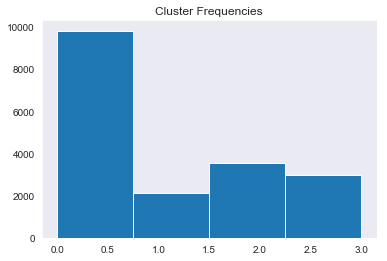

In [208]:
plt.hist(km3.labels_, bins=num_clusters)
plt.title('Cluster Frequencies')
plt.show()

### See How the Clustering Changes Through-out the Years

In [209]:
df_04to07 = job_data_clean[job_data_clean.Year <= 2007]
df_08to11 = job_data_clean[job_data_clean.Year <= 2011]
df_12to15 = job_data_clean[job_data_clean.Year <= 2015]

### 2004 - 2007

In [210]:
# refactor it to a function
def clusterdf(df_in, num):
    vec_tf = CountVectorizer()
    grain_tf = vec_tf.fit_transform(df_in['jobpost_processedtext'])
    vec_tf = CountVectorizer(min_df=2)
    grain_tf = vec_tf.fit_transform(df_in['jobpost_processedtext'])
    vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
    grain_tfidf = vec_tfidf.fit_transform(df_in['jobpost_processedtext'])
    # Use SVD to reduce dimensions
    svd = TruncatedSVD(2000)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X_lsa = lsa.fit_transform(grain_tfidf)
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))
    print_terms(km3, num)
    plt.hist(km3.labels_, bins=num)
    plt.title('Cluster Frequencies')
    plt.show()

Explained variance of the SVD step: 94%
Wall time: 2.14 s
Clusters: 4
Silhouette Coefficient for clusters: 0.014
Cluster 0: sales marketing customers customer russian market excellent products llc languages manager cjsc ability time business term service email clients services
Cluster 1: accounting financial bank tax finance credit reports banking prepare cjsc office legislation legal accountant excellent ability management chief_accountant perform software
Cluster 2: project development management ability marketing activities program support ensure implementation business international manager information training office excellent relevant projects develop
Cluster 3: software development design developer web testing test team good applications ability technical java language engineer programming senior term time net


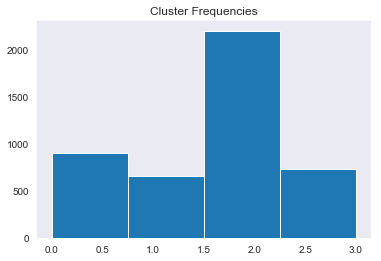

In [211]:
clusterdf(df_04to07, num_clusters)

### 2008 to 2011

Explained variance of the SVD step: 84%
Wall time: 4.46 s
Clusters: 4
Silhouette Coefficient for clusters: 0.016
Cluster 0: project management development program implementation activities ensure projects support international staff training office manager ability provide local including financial technical
Cluster 1: software development design web developer team testing technical good applications ability test systems net java programming engineer language time senior
Cluster 2: sales marketing business ability development market manager develop llc excellent russian time management customer team customers products cjsc languages services
Cluster 3: accounting financial bank credit tax finance cjsc banking office reports prepare excellent ability good legislation russian accountant management time languages


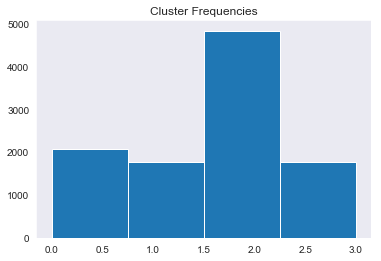

In [212]:
clusterdf(df_08to11, num_clusters)

### 2012 to 2015

In [ ]:
clusterdf(df_12to15, num_clusters)

### Named Entity Recognition -- For skillset (eg: CS, ECE, IT, etc)

In [18]:
job_data_clean["RequiredQual"].head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [49]:
tokens_clean = ['Required Qualification']
for i in job_data_clean.RequiredQual_token:
    tokens_clean.extend(preprocess(i))
print(tokens_clean)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
df = job_data_clean.drop_duplicates(['RequiredQual'])
print(df.shape)
print("Removed {0} duplicates (based on RequiredQual)".format(job_data_clean.shape[0]-df.shape[0]))

(16670, 12)
Removed 1788 duplicates (based on RequiredQual)


In [56]:
df["RequiredQual"] = df["RequiredQual"].astype(str)

In [57]:
df["RequiredQual"] = df["RequiredQual"].apply(lambda x: x.replace("\r\n", " "))
df["RequiredQual"].head()

0    To perform this job successfully, an individua...
1    - Bachelor's Degree; Master's is preferred; - ...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

### NLTK POS tagger

In [58]:
df['RequiredQual_token'] = df.RequiredQual.map(word_tokenize)

In [59]:
df['Required_Qual_POS'] = df['RequiredQual_token'].map(pos_tag, {"tagset": "universal"})

Use the extracted nouns and write the expressions to extract the degree requirements

In [60]:
def get_degree_text(tokens):
    num_tokens = len(tokens)
    position_of_degrees = None
    for idx, token_pos in enumerate(tokens):
        if token_pos[0].lower() == "degree" and tokens[idx + 1][0].lower() == "in":
            #print("degree found")
            position_of_degrees = idx + 2
    
    degree_names = []
    max_degrees = 5
    current_degrees = 0
    if position_of_degrees is not None:
        jdx = position_of_degrees
        while jdx < num_tokens and current_degrees < max_degrees:
            # if the current token is a noun family
            if tokens[jdx][1].lower().startswith("nn"):
                current_degrees += 1
                degree_names.append(tokens[jdx][0])
            # if not the current and the following tokens are noun families
            elif (jdx + 1 < num_tokens) and (not tokens[jdx + 1][1].lower().startswith("nn")):
                break
            jdx += 1
    
    #print(degree_names)
    return " ".join(degree_names)

In [61]:
df["RequiredQual_degree_names"] = df['Required_Qual_POS'].apply(get_degree_text)
df["RequiredQual_degree_names"].head(10)

0     Business Administration Accounting Finance
1                                               
2                                               
3                                         health
4                                               
5                                               
6                                     accounting
8                                               
9                                               
12                                              
Name: RequiredQual_degree_names, dtype: object

In [62]:
degree_names = ([x for x in df["RequiredQual_degree_names"] if x != ""])
degree_names_lower = [x.lower().replace(" ", "_") for x in degree_names]

Wordcloud

(-0.5, 399.5, 199.5, -0.5)

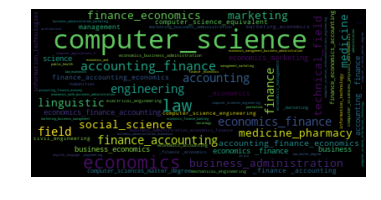

In [63]:
text = " ".join(degree_names_lower)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [110]:
#job_data_clean['AboutC'] = job_data_clean['AboutC'].apply(lambda x: clean_text(x))
#job_data_clean['JobDescription'] = job_data_clean['JobDescription'].apply(lambda x: clean_text(x))
#job_data_clean['JobRequirment'] = job_data_clean['JobRequirment'].apply(lambda x: clean_text(x))
#job_data_clean['RequiredQual'] = job_data_clean['RequiredQual'].apply(lambda x: clean_text(x))
#job_data_clean['Title'] = job_data_clean['Title'].apply(lambda x: clean_text(x))
#job_data_clean['jobpost'] = job_data_clean['jobpost'].apply(lambda x: clean_text(x))

In [111]:
#job_data_clean['AboutC'] = pre_process(job_data_clean['AboutC'])
#job_data_clean['JobDescription'] = pre_process(job_data_clean['JobDescription'])
#job_data_clean['JobRequirment'] = pre_process(job_data_clean['JobRequirment'])
#job_data_clean['RequiredQual'] = pre_process(job_data_clean['RequiredQual'])
#job_data_clean['Title'] = pre_process(job_data_clean['Title'])
#job_data_clean['jobpost'] = pre_process(job_data_clean['jobpost'])

In [25]:
job_data_clean.size

184580

### Topic Modeling -- For Job type (eg: Banking, Developer, Testing, Sales, Trainee)


In [36]:
topic_num = 7

# Use the dictionary to prepare a DTM (using TF)
dtm_train = [dictionary.doc2bow(d) for d in job_data_clean['jobpost_processed']]
lda = gensim.models.ldamodel.LdaModel(dtm_train, num_topics=topic_num, alpha='auto', chunksize=30, id2word=dictionary,
                                      passes=20, random_state=432)
# lda.show_topics()
# lda.show_topics(num_words=20)

dtopics_train = lda.get_document_topics(dtm_train)
# print topic distribution for 1st 5 rows
for i in range(0, 5):
    print(dtopics_train[i])

[(0, 0.25705722), (1, 0.060961835), (2, 0.44834307), (3, 0.042027973), (5, 0.182834)]
[(0, 0.5386315), (1, 0.18943615), (2, 0.08609612), (5, 0.017939182), (6, 0.15829948)]
[(0, 0.3640245), (1, 0.03593095), (2, 0.38175347), (6, 0.19867547)]
[(0, 0.21460578), (1, 0.019385282), (2, 0.6296445), (3, 0.049583696), (4, 0.018165508), (6, 0.06641543)]
[(0, 0.50280225), (1, 0.07246644), (2, 0.15693961), (3, 0.24399501), (5, 0.014910737)]


In [37]:
lda.show_topics()

[(0,
  '0.024*"ability" + 0.019*"service" + 0.019*"term" + 0.016*"line" + 0.015*"communication" + 0.013*"customer" + 0.012*"duration" + 0.012*"information" + 0.012*"apply" + 0.012*"field"'),
 (1,
  '0.038*"office" + 0.032*"bank" + 0.024*"document" + 0.019*"form" + 0.018*"branch" + 0.016*"prepare" + 0.015*"education" + 0.013*"applicant" + 0.012*"legislation" + 0.012*"perform"'),
 (2,
  '0.040*"project" + 0.020*"development" + 0.019*"management" + 0.015*"ensure" + 0.015*"support" + 0.014*"activity" + 0.013*"implementation" + 0.012*"plan" + 0.010*"include" + 0.010*"program"'),
 (3,
  '0.042*"development" + 0.041*"software" + 0.038*"design" + 0.025*"team" + 0.020*"system" + 0.020*"web" + 0.019*"technology" + 0.018*"test" + 0.018*"develop" + 0.017*"application"'),
 (4,
  '0.119*"september" + 0.025*"insurance" + 0.020*"roam" + 0.015*"refugee" + 0.014*"click" + 0.014*"shift" + 0.014*"road" + 0.014*"zeppelin" + 0.014*"prison" + 0.014*"resume"'),
 (5,
  '0.046*"marketing" + 0.044*"sale" + 0.028

Text(0.5, 1.0, 'Topic Frequencies')

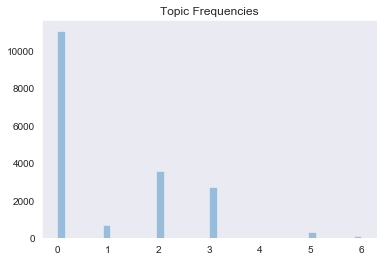

In [38]:
# get and plot the distribution of the topics
from operator import itemgetter
import matplotlib.style as style

import seaborn as sns

# style.use('seaborn-poster')
# fig, ax = plt.subplots(figsize=(16, 9))
top_train = [max(t, key=itemgetter(1))[0] for t in dtopics_train]
# plt.hist(top_train, bins=topic_num)
# plt.title('Topic Frequencies')
# plt.show()
sns.distplot(top_train, kde=False).set_title('Topic Frequencies')

In [41]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, dtm_train, dictionary)
vis

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.165096 -0.021703       1        1  35.374104
2     -0.149081 -0.017237       2        1  27.851200
3     -0.093564 -0.143552       3        1  12.591984
1     -0.055214  0.137751       4        1  10.238933
5      0.028819  0.341350       5        1   8.233703
6     -0.023738 -0.236693       6        1   4.041182
4      0.457873 -0.059917       7        1   1.668895, topic_info=      Category          Freq                  Term         Total  loglift  \
term                                                                        
62     Default  25770.000000           development  25770.000000  30.0000   
278    Default  26540.000000               project  26540.000000  29.0000   
170    Default  12165.000000              software  12165.000000  28.0000   
38     Default  14815.000000         communication  14815.000000  27.0000   
724    Default   8379.000000             marketing   8379.000000  26.0000   
797    Default   8004.000000                  sale   8004.000000  25.0000   
59     Default  11882.000000                design  11882.000000  24.0000   
124    Default  13014.000000                office  13014.000000  23.0000   
1315   Default   4336.000000             september   4336.000000  22.0000   
238    Default   9668.000000               program   9668.000000  21.0000   
72     Default  13335.000000                ensure  13335.000000  20.0000   
1157   Default   7280.000000                  bank   7280.000000  19.0000   
215    Default   8586.000000             education   8586.000000  18.0000   
154    Default  14176.000000                report  14176.000000  17.0000   
186    Default  19032.000000                  team  19032.000000  16.0000   
192    Default   5819.000000              training   5819.000000  15.0000   
350    Default  15668.000000               service  15668.000000  14.0000   
48     Default   5650.000000               control   5650.000000  13.0000   
6      Default  12252.000000              activity  12252.000000  12.0000   
142    Default   8766.000000               prepare   8766.000000  11.0000   
189    Default  16399.000000                  term  16399.000000  10.0000   
313    Default   6917.000000              document   6917.000000   9.0000   
207    Default   3788.000000             community   3788.000000   8.0000   
183    Default  12095.000000                system  12095.000000   7.0000   
2      Default   4629.000000            accounting   4629.000000   6.0000   
657    Default   5467.000000                   web   5467.000000   5.0000   
381    Default   5142.000000            technology   5142.000000   4.0000   
1045   Default   5083.000000                  test   5083.000000   3.0000   
600    Default  10114.000000              customer  10114.000000   2.0000   
114    Default  16962.000000            management  16962.000000   1.0000   
...        ...           ...                   ...           ...      ...   
1256    Topic7    406.554626                   arc    407.313934   4.0911   
455     Topic7    373.352295              conflict    374.108978   4.0910   
1183    Topic7    359.156403              operator    359.910034   4.0909   
9331    Topic7    353.149658  confirmation_message    353.902252   4.0909   
9332    Topic7    353.149658          right_corner    353.902252   4.0909   
9330    Topic7    353.149658          button_upper    353.902252   4.0909   
8200    Topic7    344.703064     questions_regarde    345.455994   4.0908   
3365    Topic7    330.953339               examine    331.710754   4.0907   
1021    Topic7    321.185822               housing    321.939972   4.0907   
956     Topic7    314.638306                 grade    315.394135   4.0906   
2736    Topic7    312.713501               contain    313.469116   4.0906   
472     Topic7    302.017914               embassy    302.771271   4.0905   
1956  

Split the data into train & Test

In [43]:
# define X and y
X = job_data_clean.jobpost_processedtext
y = job_data_clean.IT

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13843,)
(4615,)
(13843,)
(4615,)


## Vectorization (Count, Tfidf, Hashing)
    - Charter level
    - Word level
    - n-grams

In [44]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             encoding='latin-1' ,
                             min_df=0.08,
                             #max_df=0.9,
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

In [45]:
xtrain_count

<13843x276 sparse matrix of type '<class 'numpy.int64'>'
	with 991360 stored elements in Compressed Sparse Row format>

In [46]:
dtm=xtrain_count.toarray()

In [47]:
dtm

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 9, 1, ..., 1, 1, 2],
       [1, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 2, 2, 0],
       [1, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [48]:
count_vect.get_feature_names()

['_eligibility',
 'ability',
 'accord',
 'accordance',
 'account',
 'accounting',
 'activity',
 'address',
 'administration',
 'agency',
 'analysis',
 'analyze',
 'announcement',
 'applicant',
 'application',
 'apply',
 'april',
 'area',
 'ask',
 'asset',
 'assign',
 'assist',
 'assistance',
 'bachelor',
 'bank',
 'banking',
 'base',
 'basis',
 'branch',
 'budget',
 'build',
 'business',
 'c',
 'call',
 'candidate',
 'capacity',
 'career',
 'carry',
 'center',
 'change',
 'cjsc',
 'client',
 'code',
 'communicate',
 'communication',
 'company',
 'compliance',
 'computer',
 'conduct',
 'consider',
 'contact',
 'contract',
 'control',
 'coordinate',
 'country',
 'cover',
 'create',
 'criterion',
 'customer',
 'cv',
 'cvs',
 'database',
 'date',
 'datum',
 'deadline',
 'december',
 'degree',
 'deliver',
 'demonstrate',
 'department',
 'description',
 'design',
 'develop',
 'developer',
 'development',
 'director',
 'document',
 'documentation',
 'duration',
 'duty',
 'e',
 'economic',
 'e

In [49]:
dtm1=pd.DataFrame(dtm)

In [50]:
dtm1.columns=count_vect.get_feature_names()

In [51]:
dtm1.head()

,_eligibility,ability,accord,accordance,account,accounting,activity,address,administration,agency,...,url,use,user,visit,web,website,work,write,year,yerevan
0,0,0,0,0,0,4,0,0,0,0,...,1,0,0,0,0,2,0,0,1,0
1,1,9,1,2,0,0,8,0,1,0,...,1,1,0,0,0,3,10,1,1,2
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,1,0,2,0
3,0,0,0,0,0,0,1,0,0,1,...,1,1,0,0,1,2,3,1,1,5
4,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,2,0,1,0


Vectorization (count, tfidf) for both train & test

In [52]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [53]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [54]:
dtm2.head(10)

,_eligibility,ability,accord,accordance,account,accounting,activity,address,administration,agency,...,url,use,user,visit,web,website,work,write,year,yerevan
0,0.000000,0.000000,0.0000,0.000000,0.0,0.658102,0.000000,0.0,0.000000,0.000000,...,0.051425,0.000000,0.000000,0.0,0.000000,0.102850,0.000000,0.000000,0.071154,0.000000
1,0.030802,0.171345,0.0408,0.090050,0.0,0.000000,0.220040,0.0,0.038684,0.000000,...,0.012905,0.034586,0.000000,0.0,0.000000,0.038715,0.150786,0.025499,0.017856,0.061279
2,0.064313,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.026944,0.000000,0.000000,0.0,0.000000,0.053889,0.031483,0.000000,0.074563,0.000000
3,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.069897,0.0,0.000000,0.114648,...,0.032795,0.087892,0.000000,0.0,0.095146,0.065589,0.114955,0.064800,0.045376,0.389310
4,0.000000,0.198926,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.044947,0.000000,0.000000,0.0,0.000000,0.089893,0.105034,0.000000,0.062190,0.000000
5,0.000000,0.033420,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.022653,0.000000,0.000000,0.0,0.000000,0.045307,0.079407,0.089523,0.031344,0.000000
6,0.000000,0.000000,0.0000,0.224515,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.064350,0.000000,0.000000,0.0,0.000000,0.128700,0.000000,0.000000,0.089037,0.000000
7,0.074390,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.031166,0.000000,0.000000,0.0,0.000000,0.062332,0.036416,0.000000,0.043123,0.073996
8,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.051301,0.0,0.000000,0.000000,...,0.024069,0.000000,0.000000,0.0,0.000000,0.048139,0.028124,0.000000,0.000000,0.000000
9,0.000000,0.055428,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.037571,0.100693,0.131611,0.0,0.000000,0.187856,0.043899,0.074238,0.103970,0.089203


In [60]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(job_data_clean['jobpost_processedtext'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-60-c525c3bb8301>:2: DeprecationWarning: invalid escape sequence \w
  tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)


In [61]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,2), max_features=800)
tfidf_vect_ngram_chars.fit(job_data_clean['jobpost_processedtext'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-61-ae945fbd4a8a>:2: DeprecationWarning: invalid escape sequence \w
  tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,2), max_features=800)


## Create user defined function for train the models


In [56]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

## Building different models with different vectors

In [57]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)

NB  for L1, Count Vectors:  0.9180931744312026


In [58]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

NB  for L1, WordLevel TF-IDF:  0.8988082340195016


In [62]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB  for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB  for L1, N-Gram Vectors:  0.9180931744312026
NB for L1, CharLevel Vectors:  0.7980498374864572


In [63]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)



# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Logistic Regression on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("LR  for L1, N-Gram Vectors: ", accuracy_L1)



# Logistic Regression on Character Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("LR for L1, CharLevel Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.9308775731310942
LR  for L1, WordLevel TF-IDF:  0.9310942578548213
LR  for L1, N-Gram Vectors:  0.9367280606717227
LR for L1, CharLevel Vectors:  0.9178764897074756


In [64]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)



# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)



# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)



# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.9352112676056338
SVC  for L1, WordLevel TF-IDF:  0.9304442036836403
SVC  for L1, N-Gram Vectors:  0.9417118093174431
SVC for L1, CharLevel Vectors:  0.9284940411700975


## Job Similarity

In [3]:
job_data_related = job_data.filter(['Title','JobDescription','JobRequirment','RequiredQual'])

In [4]:
job_data_related['JobDescription'] = job_data_related['JobDescription'].astype(str)
job_data_related['RequiredQual'] = job_data_related['RequiredQual'].astype(str)
job_data_related['JobRequirment'] = job_data_related['JobRequirment'].astype(str)
job_data_related['Title'] = job_data_related['Title'].astype(str)

In [5]:
job_data_related['JobDescription_token'] = job_data_related['JobDescription'].map(word_tokenize)
job_data_related['RequiredQual_token'] = job_data_related['RequiredQual'].map(word_tokenize)
job_data_related['JobRequirment_token'] = job_data_related['JobRequirment'].map(word_tokenize)

In [7]:
job_data_related['JobDescription_processed'] = job_data_related.JobDescription_token.apply(preprocess)
job_data_related['RequiredQual_processed'] = job_data_related.RequiredQual_token.apply(preprocess)
job_data_related['JobRequirment_processed'] = job_data_related.JobRequirment_token.apply(preprocess)

In [9]:
job_data_related['JobDescription_processedtext'] = job_data_related.JobDescription_processed.apply(lambda x: ' '.join(x))
job_data_related['RequiredQual_processedtext'] = job_data_related.RequiredQual_processed.apply(lambda x: ' '.join(x))
job_data_related['JobRequirment_processedtext'] = job_data_related.JobRequirment_processed.apply(lambda x: ' '.join(x))

In [10]:
job_data_related.head()

,Title,JobDescription,JobRequirment,RequiredQual,JobDescription_token,RequiredQual_token,JobRequirment_token,JobDescription_processed,RequiredQual_processed,JobRequirment_processed,JobDescription_processedtext,RequiredQual_processedtext,JobRequirment_processedtext
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...","[AMERIA, Investment, Consulting, Company, is, ...","[To, perform, this, job, successfully, ,, an, ...","[-, Supervises, financial, management, and, ad...","[ameria, investment, consulting, seeking, chie...","[perform, successfully, individual, must, able...","[supervises, financial, management, administra...",ameria investment consulting seeking chief fin...,perform successfully individual must able perf...,supervises financial management administrative...
1,Full-time Community Connections Intern (paid i...,nan,nan,- Bachelor's Degree; Master's is preferred;\n-...,[nan],"[-, Bachelor, 's, Degree, ;, Master, 's, is, p...",[nan],[nan],"[bachelor, 's, degree, master, 's, preferred, ...",[nan],nan,bachelor 's degree master 's preferred excelle...,nan
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...","[Public, outreach, and, strengthening, of, a, ...","[-, Degree, in, environmentally, related, fiel...","[-, Working, with, the, Country, Director, to,...","[public, outreach, strengthening, growing, net...","[degree, environmentally, related, field, 5, y...","[working, country, director, provide, environm...",public outreach strengthening growing network ...,degree environmentally related field 5 years r...,working country director provide environmental...
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...","[The, LEAD, (, Local, Enhancement, and, Develo...","[-, Advanced, degree, in, public, health, ,, s...","[-, Identify, gaps, in, knowledge, and, overse...","[lead, local, enhancement, development, health...","[advanced, degree, public, health, social, sci...","[identify, gaps, knowledge, overseeing, inform...",lead local enhancement development health bcc ...,advanced degree public health social science c...,identify gaps knowledge overseeing information...
4,Software Developer,nan,- Rendering technical assistance to Database M...,- University degree; economical background is ...,[nan],"[-, University, degree, ;, economical, backgro...","[-, Rendering, technical, assistance, to, Data...",[nan],"[university, degree, economical, background, p...","[rendering, technical, assistance, database, m...",nan,university degree economical background plus e...,rendering technical assistance database manage...


In [11]:
tfidf_model = TfidfVectorizer()
Title_tfidf = tfidf_model.fit_transform(job_data_related['Title'])
JobDescription_tfidf = tfidf_model.fit_transform(job_data_related['JobDescription_processedtext'])
RequiredQual_tfidf = tfidf_model.fit_transform(job_data_related['RequiredQual_processedtext'])
JobRequirment_tfidf = tfidf_model.fit_transform(job_data_related['JobRequirment_processedtext'])

In [12]:
def find_similar_jobs_tfidf(index, top_n = 5):
    Title_tfidf_cosine = cosine_similarity(Title_tfidf[index:index+1], Title_tfidf).flatten()
    JobDescription_tfidf_cosine = cosine_similarity(JobDescription_tfidf[index:index+1], JobDescription_tfidf).flatten()
    RequiredQual_tfidf_cosine = cosine_similarity(RequiredQual_tfidf[index:index+1], RequiredQual_tfidf).flatten()
    JobRequirment_tfidf_cosine = cosine_similarity(JobRequirment_tfidf[index:index+1], JobRequirment_tfidf).flatten()

    average_cosine = (Title_tfidf_cosine + JobDescription_tfidf_cosine + RequiredQual_tfidf_cosine + JobRequirment_tfidf_cosine) / 4.0
    related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
    return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]

In [16]:
for index, score in find_similar_jobs_tfidf(0):
    print(job_data_related.iloc[index])
    print("SIMILARITY SCORE: ", score)

Title                                                     Chief Financial Officer
JobDescription                  The Chief Financial Officer (CFO) will support...
JobRequirment                   Financial management of the NSRCIP T1 & T2 pro...
RequiredQual                    - Degree in Accounting, Finance, Business, Law...
JobDescription_token            [The, Chief, Financial, Officer, (, CFO, ), wi...
RequiredQual_token              [-, Degree, in, Accounting, ,, Finance, ,, Bus...
JobRequirment_token             [Financial, management, of, the, NSRCIP, T1, &...
JobDescription_processed        [chief, financial, officer, cfo, support, chie...
RequiredQual_processed          [degree, accounting, finance, business, law, p...
JobRequirment_processed         [financial, management, nsrcip, t1, t2, projec...
JobDescription_processedtext    chief financial officer cfo support chief exec...
RequiredQual_processedtext      degree accounting finance business law public ...
JobRequirment_pr

In [17]:
for index, score in find_similar_jobs_tfidf(1):
    print(job_data_related.iloc[index])
    print("SIMILARITY SCORE: ", score)

Title                                                     IT Teacher  (full time)
JobDescription                                                                nan
JobRequirment                                                                 nan
RequiredQual                    - Degree in Computer Science, Information Tech...
JobDescription_token                                                        [nan]
RequiredQual_token              [-, Degree, in, Computer, Science, ,, Informat...
JobRequirment_token                                                         [nan]
JobDescription_processed                                                    [nan]
RequiredQual_processed          [degree, computer, science, information, techn...
JobRequirment_processed                                                     [nan]
JobDescription_processedtext                                                  nan
RequiredQual_processedtext      degree computer science information technology...
JobRequirment_pr

In [18]:
for index, score in find_similar_jobs_tfidf(2):
    print(job_data_related.iloc[index])
    print("SIMILARITY SCORE: ", score)

Title                                               Country Coordinator - Armenia
JobDescription                  CENN - Caucasus Environmental NGO Network - is...
JobRequirment                   -  Write first hand articles, conduct intervie...
RequiredQual                    1. Education: University education in environm...
JobDescription_token            [CENN, -, Caucasus, Environmental, NGO, Networ...
RequiredQual_token              [1, ., Education, :, University, education, in...
JobRequirment_token             [-, Write, first, hand, articles, ,, conduct, ...
JobDescription_processed        [cenn, caucasus, environmental, ngo, network, ...
RequiredQual_processed          [1, education, university, education, environm...
JobRequirment_processed         [write, first, hand, articles, conduct, interv...
JobDescription_processedtext    cenn caucasus environmental ngo network lookin...
RequiredQual_processedtext      1 education university education environmental...
JobRequirment_pr